<a href="https://colab.research.google.com/github/sg2083/vis/blob/main/ps0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nutritional Value in Fast Food
## Introduction
In today’s busy world, fast food is all about convenience and quick meals. Chains like McDonald's, Burger King, and Taco Bell have become a staple in our daily lives, offering tasty options to fit our time crunch. While fast food is easy and satisfying, it's important to consider its health impact. These meals are often high in fats, sugars, and salts, and made quickly using additives, which can affect our well-being.

Fast food nutrition goes beyond just calories—it includes fats, sugars, protein, and more. Understanding these details helps us make smarter choices. This analysis focuses on the nutritional profiles of six big fast food brands: McDonald's, Burger King, Wendy's, KFC, Taco Bell, and Pizza Hut. By examining this data, we aim to help people make better food choices while balancing their busy lives and health.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
url = "https://raw.githubusercontent.com/sg2083/vis/main/FastFoodNutritionMenuV2.csv"
df = pd.read_csv(url)
df.head()

,Company,Item,Calories,Calories from\nFat,Total Fat\n(g),Saturated Fat\n(g),Trans Fat\n(g),Cholesterol\n(mg),Sodium \n(mg),Carbs\n(g),Fiber\n(g),Sugars\n(g),Protein\n(g),Weight Watchers\nPnts
0,McDonald’s,Hamburger,250,80,9,3.5,0.5,25,520,31,2,6,12,247.5
1,McDonald’s,Cheeseburger,300,110,12,6,0.5,40,750,33,2,6,15,297
2,McDonald’s,Double Cheeseburger,440,210,23,11,1.5,80,1150,34,2,7,25,433
3,McDonald’s,McDouble,390,170,19,8,1,65,920,33,2,7,22,383
4,McDonald’s,Quarter Pounder® with Cheese,510,230,26,12,1.5,90,1190,40,3,9,29,502


This section focuses on loading and preprocessing the dataset to ensure it’s ready for analysis. We'll use Pandas to load the data and address issues like missing values (NaN) and formatting quirks, such as "<1" in the carbs column and hidden spaces. The Weight Watchers points column, with many missing values, may be removed to avoid skewing results. The goal is to clean the data, transforming categorical values into numerical ones, and preparing the dataset for accurate analysis. Each step ensures the data remains reliable and meaningful for the next phases of the project.


In [ ]:
# Transform the column names
df.columns = [name.replace('\n', " ") for name in df.columns]

# A quick look at the data frame
df.sample(10)

,Company,Item,Calories,Calories from Fat,Total Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Carbs (g),Fiber (g),Sugars (g),Protein (g),Weight Watchers Pnts
637,Wendy’s,"Sweetened Iced Tea, Small",160,NaN,0,0,0,0,10,41,0,40,0,200
602,Wendy’s,"Fanta Orange, Small",210,NaN,0,0,0,0,55,59,0,58,0,268
384,Burger King,Kids Oatmeal,170,30,3,1.5,0,5,260,32,3,12,4,180
928,Taco Bell,Nachos BellGrande® – Beef,740,340,38,7,0,25,1050,82,15,5,16,NaN
215,McDonald’s,Nonfat Hazelnut Cappuccino (Large),230,0,0,0,0,5,100,51,0,51,7,274
875,KFC,Tropicana® Pink Lemonade (12 fl oz),150,NaN,0,0,0,0,160,40,0,40,0,190
455,Burger King,Sprite®‡,,,,,,,,,,,,
564,Wendy’s,Chili Cheese Fries,500,NaN,25,8,0.5,35,710,53,6,4,16,496
210,McDonald’s,Nonfat Caramel Latte (Small),170,0,0,0,0,5,150,36,0,36,7,199
868,KFC,Tropicana® Fruit Punch (16 fl oz),230,NaN,0,0,0,0,45,60,0,60,0,290


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1148 entries, 0 to 1147
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Company               1148 non-null   object
 1   Item                  1148 non-null   object
 2   Calories              1147 non-null   object
 3   Calories from Fat     642 non-null    object
 4   Total Fat (g)         1091 non-null   object
 5   Saturated Fat (g)     1091 non-null   object
 6   Trans Fat (g)         1091 non-null   object
 7   Cholesterol (mg)      1147 non-null   object
 8   Sodium  (mg)          1147 non-null   object
 9   Carbs (g)             1091 non-null   object
 10  Fiber (g)             1091 non-null   object
 11  Sugars (g)            1147 non-null   object
 12  Protein (g)           1091 non-null   object
 13  Weight Watchers Pnts  887 non-null    object
dtypes: object(14)
memory usage: 125.7+ KB


In [ ]:
df.isnull().sum()

,0
Company,0
Item,0
Calories,1
Calories from Fat,506
Total Fat (g),57
Saturated Fat (g),57
Trans Fat (g),57
Cholesterol (mg),1
Sodium (mg),1
Carbs (g),57


In [ ]:
# Define a collection for the special values
special_values_collection = {}

# Define a format string for output
fmt = "\t{:25}: {:2}"

# Loop through each column starting from the third column (index 2)
for column in df.columns[2:]:

    # Initialize the value of the collections to a list
    special_values_collection[column] = []

    # Initialize counters for special values and null values
    special_value_count = 0
    null_values = df[column].isnull().sum()

    # Iterate through unique values in the column
    for value in df[column].unique():

        try:
            # Convert the value to float to check if it's a number
            float_value = float(value)

        except:

            # Add the special values into the collection
            special_values_collection[column].append(value)

            # If conversion fails, it's a special character
            special_chars = df[column].value_counts().get(value)
            special_value_count += special_chars

In [ ]:
print(f"Total number of columns/features : {len(df.columns)}")
# Dropping the complete column
df.drop(columns=['Weight Watchers Pnts', 'Protein (g)'], axis=1, inplace=True)
print(f"Total number of columns/features(updated) : {len(df.columns)}")

Total number of columns/features : 12
Total number of columns/features(updated) : 12


In [ ]:
def update_column(column: str) -> None:
    special_chars = special_values_collection[column]
    values = df[~df[column].isin(special_chars)][column].dropna().astype(float)

    mean_value = round(values.mean(), 3)

    df[column].fillna(mean_value, inplace=True)

    for special_char in special_chars:
        if special_char == "<1":
            df[column].replace(special_char, 0, inplace=True)
        else:
            df[column].replace(special_char, mean_value, inplace=True)

    df[column] = df[column].map(lambda x: float(x))

for column in df.columns[2:]:
    update_column(column)

<ipython-input-13-178bcb3b4a31>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(mean_value, inplace=True)
<ipython-input-13-178bcb3b4a31>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

In [ ]:
df.isnull().sum()

,0
Company,0
Item,0
Calories,0
Calories from Fat,0
Total Fat (g),0
Saturated Fat (g),0
Trans Fat (g),0
Cholesterol (mg),0
Sodium (mg),0
Carbs (g),0


## Variables taken into consideration.

1. Comapny Name and Frequency Distribution Count.

In terms of company representation, McDonald’s leads with a count of 330, highlighting its dominance in the fast-food industry. KFC follows with 218, showing its strong and loyal customer base. Burger King has 192, indicating a solid presence, while Taco Bell, with 183, also shows consistent appeal. Wendy’s has 154, maintaining relevance through quality and social media engagement, and Pizza Hut has the lowest count at 74, suggesting potential for growth.

Notably, McDonald's, KFC, and Burger King together account for over 50% of the dataset, which could introduce bias. To address this, analyzing each company’s distribution individually will allow us to understand both specific and broader trends more accurately.

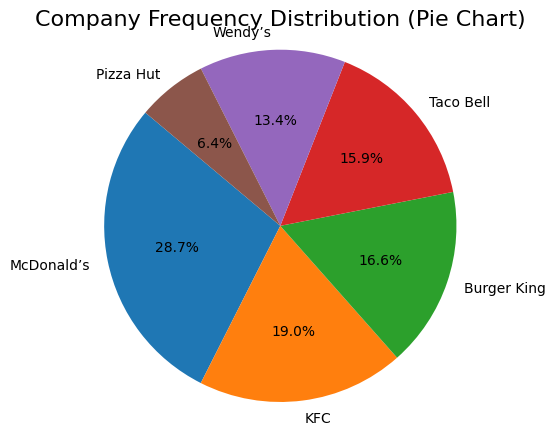

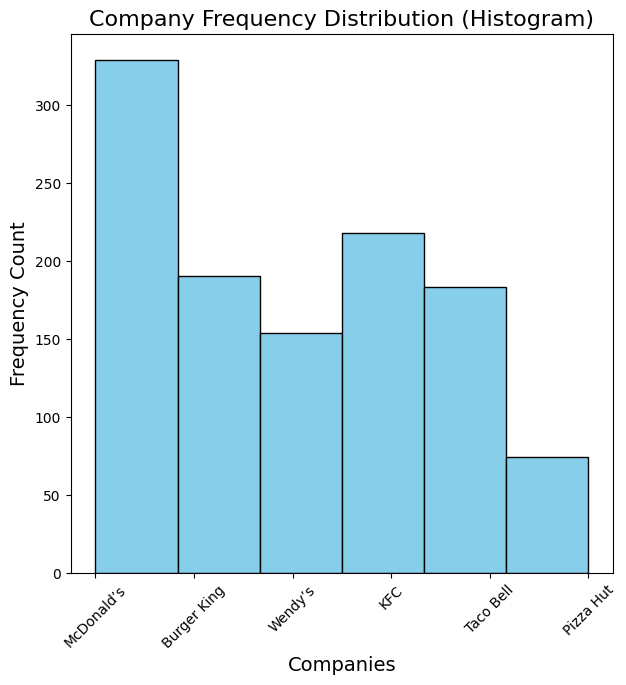

In [ ]:
# Calculate company value counts
company_value_counts = df['Company'].value_counts()

# Pie chart
plt.figure(figsize=(5, 5))
plt.pie(company_value_counts, labels=company_value_counts.index, autopct='%1.1f%%', startangle=140)

# Customize layout
plt.title("Company Frequency Distribution (Pie Chart)", fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

# Plotting the histogram
plt.figure(figsize=(7, 7))
plt.hist(df['Company'], bins=len(df['Company'].unique()), color='skyblue', edgecolor='black')

# Customize layout
plt.title("Company Frequency Distribution (Histogram)", fontsize=16)
plt.xlabel("Companies", fontsize=14)
plt.ylabel("Frequency Count", fontsize=14)
plt.xticks(rotation=45)
plt.show()


This code generates a boxplot to visualize the distribution of calories across different fast food companies. It first converts the 'Calories' column to numeric values, handling any errors by coercing them to NaN. The companies are sorted by the median calorie count, and a boxplot is created with a custom color palette, adjusted line widths, and large red markers for outliers. The plot includes a title, labeled axes, and gridlines for clarity. The layout is optimized for spacing, and the plot is displayed with plt.show(). This results in a clear, aesthetically pleasing comparison of calorie distributions among various companies.

<ipython-input-9-6e84e369267e>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Company', y='Calories', data=df, palette="coolwarm", linewidth=2.5, fliersize=8,


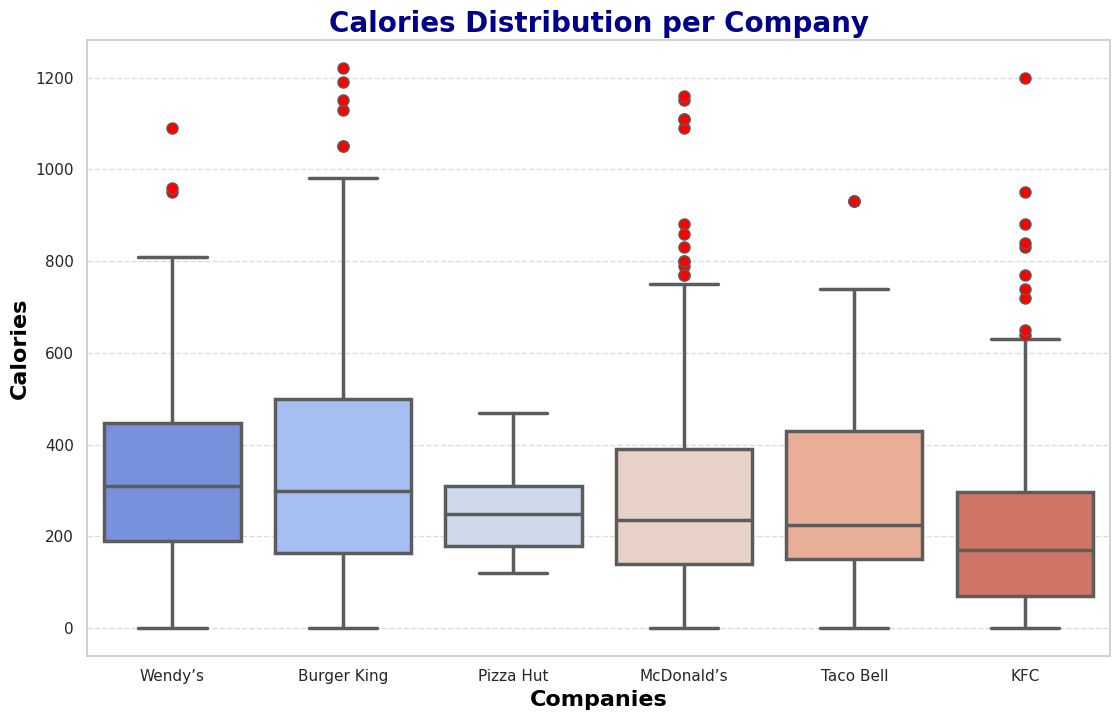

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert 'Calories' column to numeric, coercing any errors to NaN
df['Calories'] = pd.to_numeric(df['Calories'], errors='coerce')

# Set a more appealing style and color palette
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

# Sort companies by median of Calories
company_order = df.groupby('Company')['Calories'].median().sort_values(ascending=False).index

# Box plot with customized color and styling, using sorted order
sns.boxplot(x='Company', y='Calories', data=df, palette="coolwarm", linewidth=2.5, fliersize=8,
            flierprops=dict(marker='o', markerfacecolor='red', markersize=8, linestyle='none'),
            order=company_order)

# Customize layout for better readability
plt.title("Calories Distribution per Company", fontsize=20, fontweight='bold', color='darkblue')
plt.xlabel("Companies", fontsize=16, fontweight='bold', color='black')
plt.ylabel("Calories", fontsize=16, fontweight='bold', color='black')



# Add gridlines for better alignment
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout for y-axis label spacing
plt.tight_layout(pad=3.0)

# Show the plot
plt.show()
